# Urmia Lake Project 

This is a large project regarding saving an in-danger Lake named Urmia Lake in North West of Iran (see the following image from https://www.theguardian.com/). In this Notebook page explanatory Data Analyses is perfomerd in order to clean the data for the next Machine learning and more advanced statistical analysis to find out what is the main reason for the lake running dry. And, how it can be prevented. The following Data Sets are analayzed in the Note book:  

* Revers corrosponding basin area (Km^2)
* Rivers' monthly water flow to the lake (m^3) (1972-present)
* Monthly Percipitation (Rain)  data (mm) (1972-present)


___
<a href=''> <img src='https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2015/1/23/1421981805869/e1d6a83b-c92e-469b-8cb1-a5e14e05174e-1020x994.jpeg?width=445&quality=45&auto=format&fit=max&dpr=2&s=591cb8a9ba42ef64d259af6dfb334267' alt="Urmia Lake" width="400" height="400" /></a>
___





In [1]:
import numpy as np 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Yasser Bigdeli\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data : Basin area corrosponding to each river

In [3]:
Flow_to_Lake=pd.read_excel('Flow to Lake.xls', sheet_name='Area of H S' )

In [4]:
Flow_to_Lake.head(10)

,River,station,Code,X,Y,Area (Km2)
0,Daryan Chay,Daryan,1,553766.188440,4.229355e+06,57.50
1,Senikh Chay,Pol e Senikh,2,604920.839950,4.230032e+06,497.50
2,Aji Chay,Akhule,3,593278.838795,4.208870e+06,9752.40
3,Azar Shahr Chay,Ghermez Gol,4,595230.517300,4.175847e+06,103.10
4,Ghale Chay,Shishevan,5,576932.075735,4.146604e+06,533.88
5,Mah Pari,Khorma zard,6,602418.994409,4.142600e+06,88.75
6,Sufi Chay,Bonab,7,594366.199378,4.130343e+06,756.00
7,Mordagh Chay,Gheshlagh e Amir,8,613488.573702,4.129281e+06,376.80
8,Leylan Chay,Shirinkandi,9,613377.312524,4.098005e+06,691.30
9,Simineh Roud,Miyanduab,10,593936.723957,4.090710e+06,3368.00


In [5]:
f_to_lake=Flow_to_Lake.sort_values(by='Area (Km2)')

In [6]:
f_to_lake.set_index('River', inplace=True)

In [7]:
f_to_lake.head()

,station,Code,X,Y,Area (Km2)
River,,,,,
Daryan Chay,Daryan,1,553766.188440,4.229355e+06,57.50
Mah Pari,Khorma zard,6,602418.994409,4.142600e+06,88.75
Azar Shahr Chay,Ghermez Gol,4,595230.517300,4.175847e+06,103.10
Roze Chay,Pol e Ozbak,14,513040.292685,4.168519e+06,331.00
Mordagh Chay,Gheshlagh e Amir,8,613488.573702,4.129281e+06,376.80


In [8]:
# plt.figure(figsize=(6,3))
# f_to_lake['Area (Km2)'].plot(kind='bar', color='b')
# plt.ylabel('Basin Area (Km2)')
# plt.ylim([-1000, 12000])
# plt.savefig('Basin Area.png', dpi=300, bbox_inches = "tight")

In [9]:
area_percent=pd.DataFrame(f_to_lake['Area (Km2)']*100/f_to_lake['Area (Km2)'].sum())
area_percent

,Area (Km2)
River,
Daryan Chay,0.151880
Mah Pari,0.234424
Azar Shahr Chay,0.272328
Roze Chay,0.874303
Mordagh Chay,0.995279
Senikh Chay,1.314096
Ghale Chay,1.410190
Shahr Chay,1.769737
Leylan Chay,1.825999


Text(0, 0.5, 'Basin Area (%)')

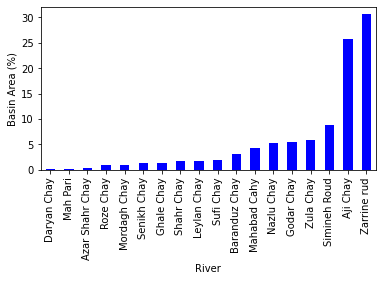

In [10]:
plt.figure(figsize=(6,3))
(f_to_lake['Area (Km2)']*100/f_to_lake['Area (Km2)'].sum()).plot(kind='bar', color='b')
plt.ylabel('Basin Area (%)')
# plt.ylim([-1000, 12000])
# plt.savefig('Basin Area_percent.png', dpi=300, bbox_inches = "tight")

In [11]:
f_to_lake.head()

,station,Code,X,Y,Area (Km2)
River,,,,,
Daryan Chay,Daryan,1,553766.188440,4.229355e+06,57.50
Mah Pari,Khorma zard,6,602418.994409,4.142600e+06,88.75
Azar Shahr Chay,Ghermez Gol,4,595230.517300,4.175847e+06,103.10
Roze Chay,Pol e Ozbak,14,513040.292685,4.168519e+06,331.00
Mordagh Chay,Gheshlagh e Amir,8,613488.573702,4.129281e+06,376.80


## Data : Flow to the Lake 

In [12]:
Flow_to_Lake_EN=pd.read_excel('Flow to Lake.xls', sheet_name='EN' , skiprows=[0,2,3,4,5])

In [13]:
Flow_to_Lake_EN.head(5)

,River,Unnamed: 1,Daryan Chay,Senikh Chay,Aji Chay,Azar Shahr Chay,Ghale Chay,Mah Pari,Sufi Chay,Mordagh Chay,...,Mahabad Cahy,Baranduz Chay,Shahr Chay,Roze Chay,Nazlu Chay,Zula Chay,Zarrine rud,Godar Chay,18 Stations,Unnamed: 21
0,AREA (Km2),NaN,57.500000,497.500000,9752.400000,103.100000,533.880000,88.750000,756.0,376.800000,...,1635.000000,1160.000000,670.000000,331.000000,1965.000000,2204.000000,11578.500000,2090.000000,Total,MCM
1,1972,SEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,OCT,0.690968,0.936355,1.236774,0.567774,0.731613,0.162258,0.0,1.368710,...,1.035909,3.339677,0.068065,0.279881,0.987097,0.240968,44.102581,2.767419,66.6052,178.395367
3,1972,NOV,1.680000,1.652000,4.458000,0.892700,1.932000,0.278000,0.0,2.394000,...,2.738807,7.656000,0.168000,0.531166,3.556000,0.869000,44.258000,7.762000,99.283852,257.343744
4,1972,DEC,0.501935,1.276226,7.055484,0.607742,0.953548,0.233871,0.0,2.018387,...,2.785945,7.870645,0.047419,0.404079,5.623226,1.379355,55.986452,10.075806,109.71541,293.861755


In [14]:
Area=pd.DataFrame(Flow_to_Lake_EN.loc[0])

In [15]:
Flow_to_Lake_EN.drop([0,1], axis=0, inplace=True)

In [16]:
Flow_to_Lake_EN.rename(columns={'River':'Year', 'Unnamed: 1':'Month','18 Stations':'Total'}, inplace=True)

In [17]:
Flow_to_Lake_EN.drop('Unnamed: 21', axis=1,inplace=True)

In [18]:
Flow_to_Lake_EN.columns

Index(['Year', 'Month', 'Daryan Chay', 'Senikh Chay', 'Aji Chay',
       'Azar Shahr Chay', 'Ghale Chay', 'Mah Pari', 'Sufi Chay',
       'Mordagh Chay', 'Leylan Chay', 'Simineh Roud', 'Mahabad Cahy',
       'Baranduz Chay', 'Shahr Chay', 'Roze Chay', 'Nazlu Chay', 'Zula Chay',
       'Zarrine rud', 'Godar Chay', 'Total'],
      dtype='object')

In [19]:
Flow_to_Lake_EN.set_index('Year', inplace=True)

In [20]:
Flow_to_Lake_EN.isna().sum()

Month              0
Daryan Chay        4
Senikh Chay        4
Aji Chay           4
Azar Shahr Chay    4
Ghale Chay         4
Mah Pari           4
Sufi Chay          4
Mordagh Chay       4
Leylan Chay        4
Simineh Roud       4
Mahabad Cahy       4
Baranduz Chay      4
Shahr Chay         4
Roze Chay          4
Nazlu Chay         4
Zula Chay          4
Zarrine rud        4
Godar Chay         4
Total              4
dtype: int64

In [21]:
Flow_to_Lake_EN.dropna(inplace=True)

In [22]:
Flow_to_Lake_EN

,Month,Daryan Chay,Senikh Chay,Aji Chay,Azar Shahr Chay,Ghale Chay,Mah Pari,Sufi Chay,Mordagh Chay,Leylan Chay,Simineh Roud,Mahabad Cahy,Baranduz Chay,Shahr Chay,Roze Chay,Nazlu Chay,Zula Chay,Zarrine rud,Godar Chay,Total
Year,,,,,,,,,,,,,,,,,,,,
1972,OCT,0.690968,0.936355,1.236774,0.567774,0.731613,0.162258,0.000000,1.368710,1.362377,6.726774,1.035909,3.339677,0.068065,0.279881,0.987097,0.240968,44.102581,2.767419,66.6052
1972,NOV,1.680000,1.652000,4.458000,0.892700,1.932000,0.278000,0.000000,2.394000,1.367178,17.091000,2.738807,7.656000,0.168000,0.531166,3.556000,0.869000,44.258000,7.762000,99.283852
1972,DEC,0.501935,1.276226,7.055484,0.607742,0.953548,0.233871,0.000000,2.018387,1.729483,11.165806,2.785945,7.870645,0.047419,0.404079,5.623226,1.379355,55.986452,10.075806,109.71541
1973,JAN,0.330323,1.916032,10.872903,0.796387,1.623871,0.207097,0.178129,1.753226,1.868922,18.251613,5.348902,7.495161,0.039032,0.258141,8.667742,2.128710,60.500323,10.690000,132.926512
1973,FEB,0.375000,1.406286,10.335000,0.738607,1.896071,0.303571,1.204964,2.579643,2.631999,34.490357,14.000292,10.247143,0.926429,0.551400,8.240000,2.021786,85.202500,13.498929,190.649977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,APR,0.699333,0.611000,0.910667,1.938333,0.000000,1.021000,2.735036,1.904333,0.436000,5.400667,0.630000,13.446000,0.685667,1.560000,14.654333,1.726000,41.249171,6.381985,95.989525
2009,MAY,0.406581,0.740419,0.884387,2.592935,0.000000,0.865258,4.347369,1.998871,0.156774,3.154452,1.004516,15.372129,0.780032,0.677742,15.886871,0.189677,38.117035,7.069701,94.24475
2009,JUN,0.388600,0.677100,2.204300,1.224500,0.000000,0.182700,1.730652,0.179100,0.002100,0.138600,1.239600,6.078700,1.271500,0.926500,1.693300,0.000000,21.424878,2.410104,41.772234


In [23]:
Flow_to_Lake_year=31*Flow_to_Lake_EN.groupby('Year').sum()

In [24]:
Flow_to_Lake_year.head(5)

,Daryan Chay,Senikh Chay,Aji Chay,Azar Shahr Chay,Ghale Chay,Mah Pari,Sufi Chay,Mordagh Chay,Leylan Chay,Simineh Roud,Mahabad Cahy,Baranduz Chay,Shahr Chay,Roze Chay,Nazlu Chay,Zula Chay,Zarrine rud,Godar Chay
Year,,,,,,,,,,,,,,,,,,
1972,89.060000,119.80200,395.258000,64.114700,112.132000,20.898000,0.000000,179.214000,138.230212,1084.491000,203.380485,584.856000,8.788000,37.668920,315.156000,77.169000,4474.758000,638.762000
1973,243.791000,358.50239,4581.638000,377.658988,670.098881,136.739714,457.269693,1165.294595,815.602909,6012.556405,2248.695658,3630.602429,991.954286,528.355614,3653.093667,896.700690,24510.040167,4802.981452
1974,256.874143,570.22404,3301.259095,351.099155,1102.817405,118.933310,406.178962,1066.860148,1043.913740,5789.256520,2757.341389,3895.575571,1022.059048,465.076017,2632.400548,755.090214,32743.773857,5015.930000
1975,99.386167,95.84109,6523.916381,251.472581,548.120262,61.569214,321.621971,931.977121,663.635114,4958.755405,1239.743721,1571.319881,410.986238,286.608512,5201.374048,614.624071,13501.630833,2876.659952
1976,158.803762,472.60870,6648.094381,312.639033,466.715524,126.690024,464.636440,1209.030960,850.604145,8652.438167,3072.446194,4492.314548,1934.759810,612.136260,5300.542381,1095.899905,26537.417167,4905.543524


In [25]:
len(Flow_to_Lake_year.columns)

18

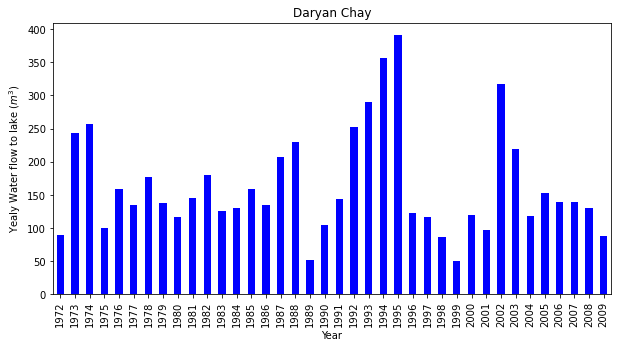

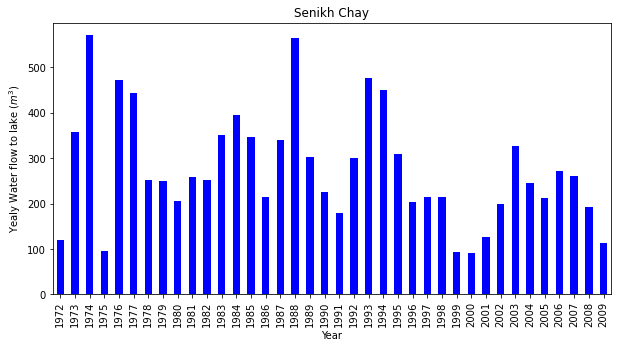

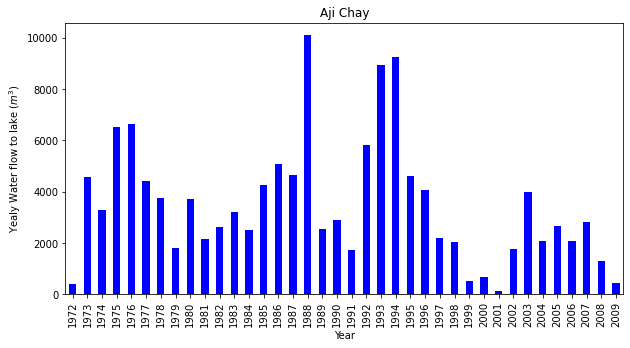

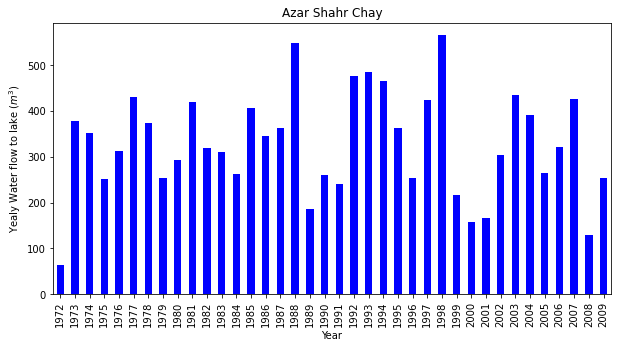

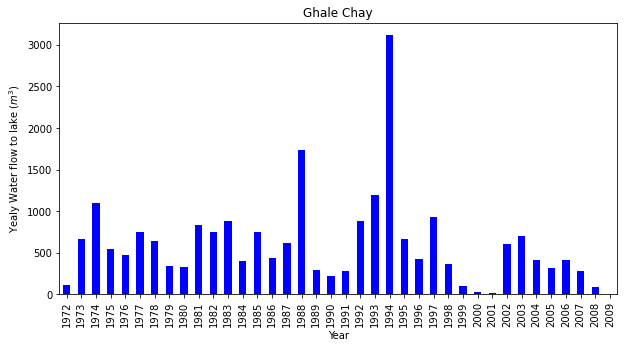

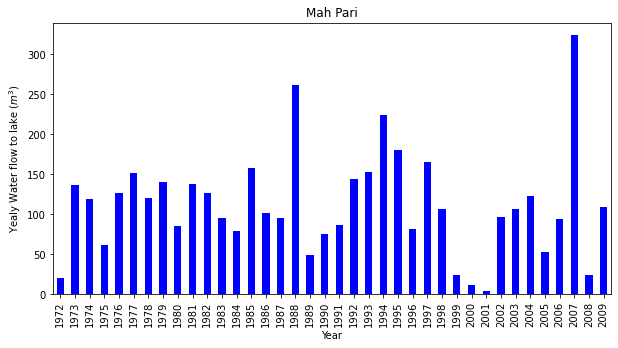

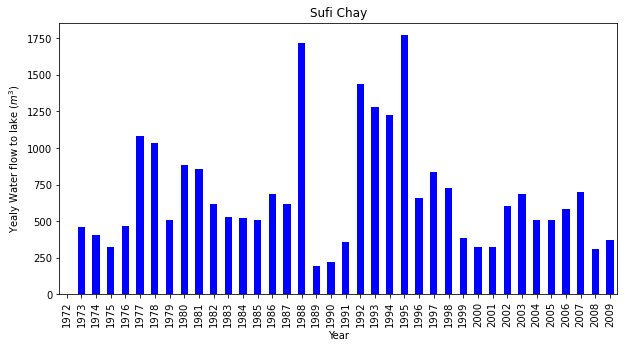

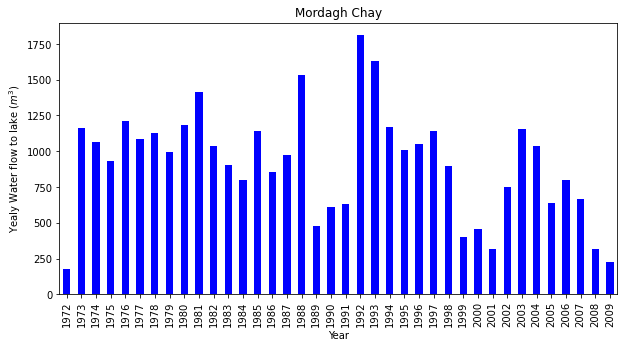

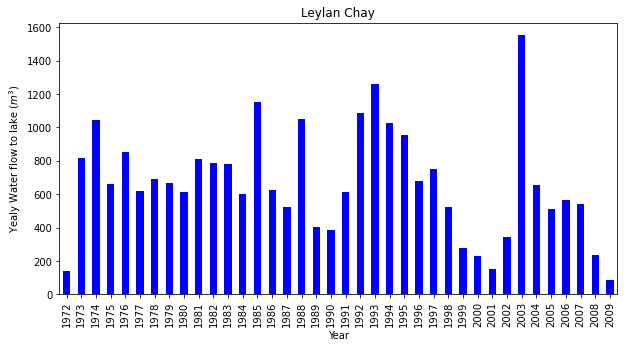

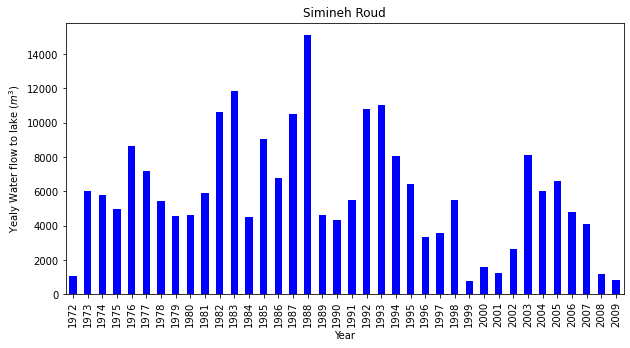

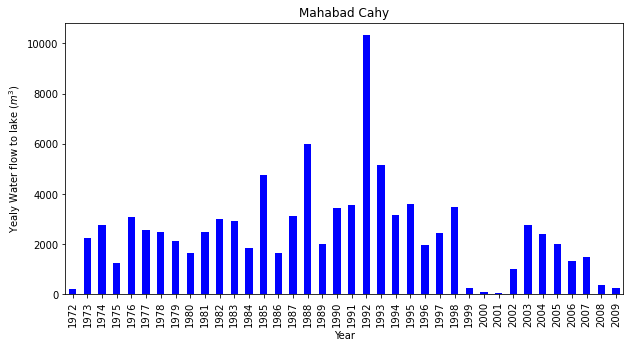

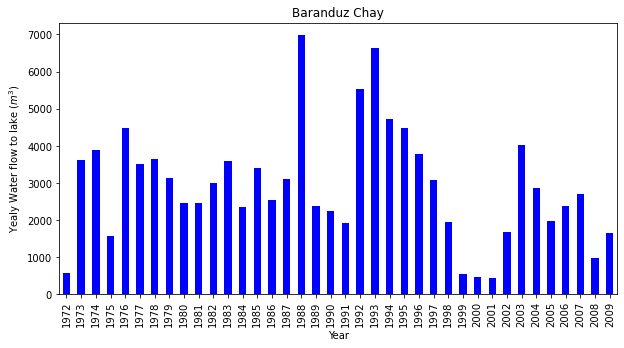

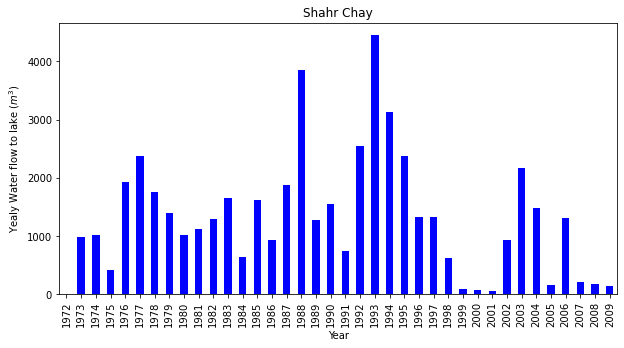

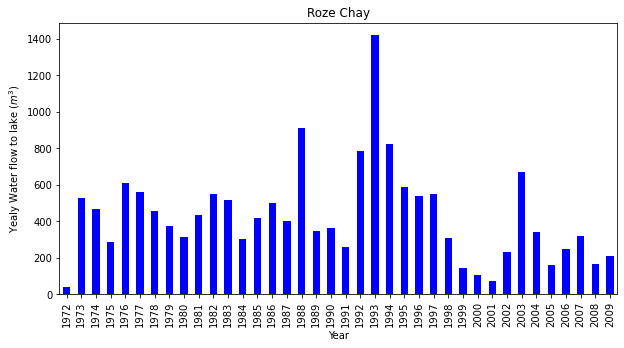

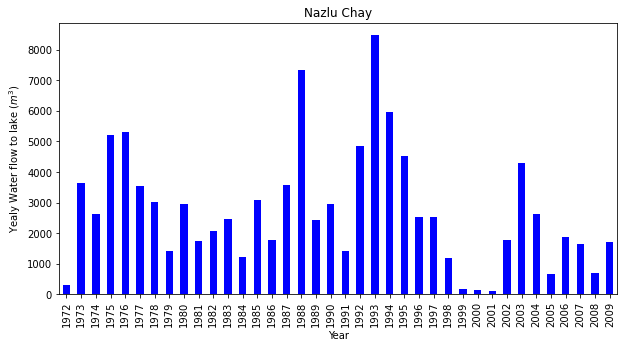

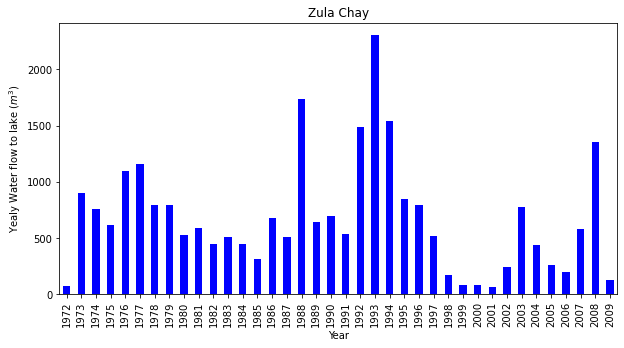

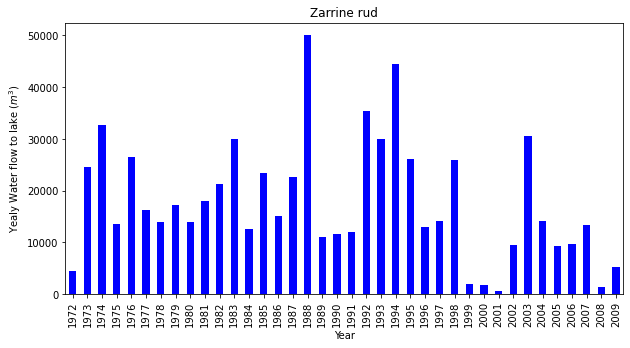

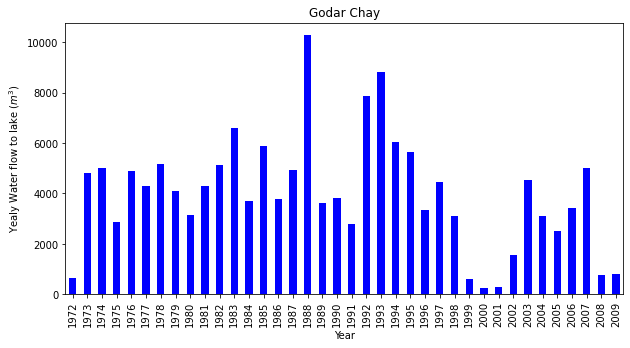

In [26]:
for river in Flow_to_Lake_year.columns:
    plt.figure(figsize=(10,5))
    Flow_to_Lake_year[river].plot(kind='bar', color='b')
    plt.title(river)
    plt.ylabel('Yealy Water flow to lake ($m^3$)')
    plt.xlabel('Year')
#     plt.savefig(river+'.png', dpi=150, bbox_inches='tight')
    plt.show()

Text(0, 0.5, 'Total water flow to lake ($m^3$)')

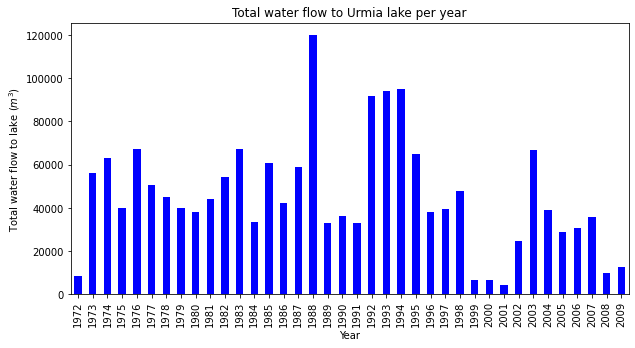

In [27]:
plt.figure(figsize=(10,5))
Flow_to_Lake_year.sum(axis=1).plot(kind='bar', color='b')
plt.title('Total water flow to Urmia lake per year')
plt.ylabel('Total water flow to lake ($m^3$)')
# plt.savefig('Total water flow to lake.png', dpi=150, bbox_inches='tight')

In [28]:
sum_2009=Flow_to_Lake_EN.sum(axis=0)
sum2009=pd.DataFrame(sum_2009)

In [29]:
sum2009.rename(columns={0:'total deposite'}, inplace=True)
# sum2009.rename(index='Month')


In [30]:
sum2009.drop('Month', inplace=True)

In [31]:
sum2009.drop('Total', inplace=True)

In [32]:
sum2009.sort_values(by='total deposite', inplace=True)

In [33]:

sum2009['Percent']=100*sum2009['total deposite']/sum2009['total deposite'].sum()

In [34]:
sum2009.to_excel('total_deposit_YB.xlsx')

Text(0, 0.5, 'Total Contribution to lake (%)')

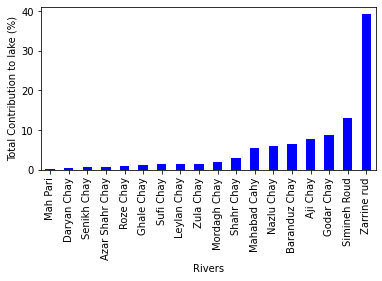

In [35]:
plt.figure(figsize=(6,3))
sum2009['Percent'].plot(kind='bar', color='b')
plt.xlabel('Rivers')
plt.ylabel('Total Contribution to lake (%)')
# plt.savefig('total contibution_percent.png', dpi=300,bbox_inches="tight")

In [36]:
merged_df=area_percent.join(sum2009)

In [37]:
merged_df.drop('total deposite', axis=1,inplace=True)

In [38]:
merged_df.rename(columns={'Area (Km2)': "Basin Area %",'Percent':'Water input %' }, inplace=True)
merged_df.columns

Index(['Basin Area %', 'Water input %'], dtype='object')

Text(0.5, 0, 'Rivers')

<Figure size 720x216 with 0 Axes>

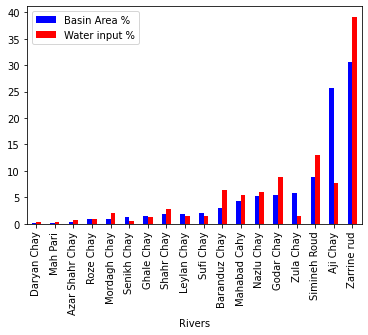

In [39]:
plt.figure(figsize=(10,3))
merged_df.plot(kind='bar', color=['b', 'r'])
plt.xlabel('Rivers')
# plt.savefig('Comparison_percent.png', dpi=300,bbox_inches="tight")

In [60]:
# merged_df.head()
merged_df.columns

Index(['Basin Area %', 'Water input %'], dtype='object')

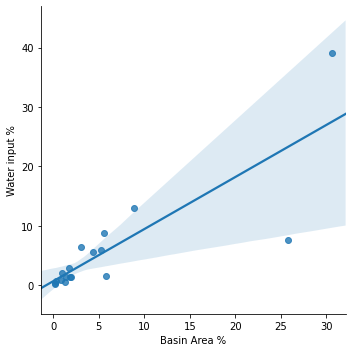

In [76]:

g = sns.lmplot(x="Basin Area %", y='Water input %', data=merged_df)
plt.savefig('Basin_flow_corr.png', dpi=150, bbox_inches='tight')

<AxesSubplot:ylabel='Percent'>

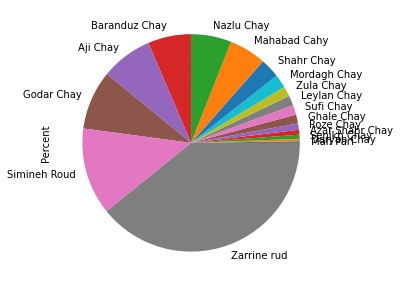

In [42]:
plt.figure(figsize=(5,5))
sum2009['Percent'].plot(kind='pie')
# plt.xlabel('Rivers')
# plt.ylabel('Total Contribution to lake ($m^3$)')
# plt.savefig('total contibution_pie.png', dpi=300,bbox_inches="tight")

In [43]:
# plt.figure(figsize=(15,15))
# plt.pie(sum2009['Percent'],labels=sum2009.index)

## Data : Rain Over the Basin _ station Data 

In [44]:
Rain=pd.read_excel('Rain over the Basin.xls', sheet_name='EN', skiprows=(1,2,3,4,5))

In [45]:
Rain.columns[-7:]

Index(['228 ايستگاه', 'Unnamed: 231', 'Unnamed: 232', 'Unnamed: 233',
       'Unnamed: 234', 'Unnamed: 235', 'Unnamed: 236'],
      dtype='object')

In [46]:
Rain.drop(['228 ايستگاه', 'Unnamed: 231', 'Unnamed: 232', 'Unnamed: 233',
       'Unnamed: 234', 'Unnamed: 235', 'Unnamed: 236'], axis=1, inplace=True)

In [47]:
Rain.dropna(inplace=True)

In [48]:
Rain.isna().sum()

Station           0
Unnamed: 1        0
Abajalue sofla    0
Afan              0
Afshord           0
                 ..
Zeinalu           0
Zereh shuran      0
Zhaar abad        0
Zinjanab          0
Ziveh             0
Length: 230, dtype: int64

In [49]:
Rain.rename(columns={'Station':'Year','Unnamed: 1':'Month' }, inplace=True)

In [50]:
Rain.set_index('Year', inplace=True)

In [51]:
Rain.head()

,Month,Abajalue sofla,Afan,Afshord,Agbulagh,Ahmad abade saghez,Ajab shir,Akhuleh,Alasaghal,Aluche molk,...,Zafar abad,Zang abad,Zanjir abad,Zanjireh,Zaviye sheikh,Zeinalu,Zereh shuran,Zhaar abad,Zinjanab,Ziveh
Year,,,,,,,,,,,,,,,,,,,,,
1972,OCT,17.532258,25.548387,30.028065,16.354839,26.010000,8.070968,7.141935,19.829032,13.831290,...,19.405161,22.180645,15.065806,30.306452,20.258065,14.322581,49.607419,24.909677,21.919355,20.296452
1972,NOV,45.540000,84.400000,73.718000,44.500000,78.778000,25.460000,19.641000,61.055000,33.146000,...,52.008000,65.330000,41.556000,79.848000,33.200000,36.900000,132.152000,75.150000,56.900000,80.548000
1972,DEC,21.558065,71.161290,3.919032,34.322581,46.240323,19.677419,8.373226,38.143548,24.951935,...,11.935484,38.241935,30.069677,41.469677,22.645161,25.161290,33.013226,52.461290,11.403226,76.282903
1973,JAN,19.645161,76.967742,15.047742,38.193548,27.238710,21.341935,13.683226,38.992581,11.470000,...,11.179677,32.193548,24.529355,42.593226,24.000000,28.338710,20.561613,74.990323,12.145161,29.219677
1973,FEB,20.607143,92.500000,30.680357,42.553571,21.757143,22.964286,17.564286,48.391786,12.460714,...,29.384286,29.535714,36.161786,23.010000,23.678571,25.303571,44.752857,108.760714,20.053571,42.335000


In [52]:
228/4


57.0

C:\Users\Yasser Bigdeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 720x360 with 0 Axes>

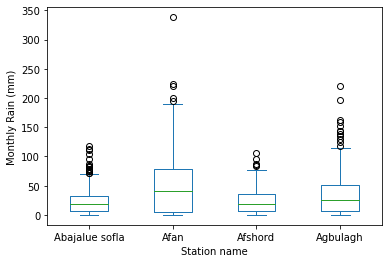

<Figure size 720x360 with 0 Axes>

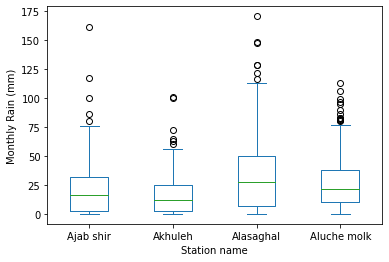

<Figure size 720x360 with 0 Axes>

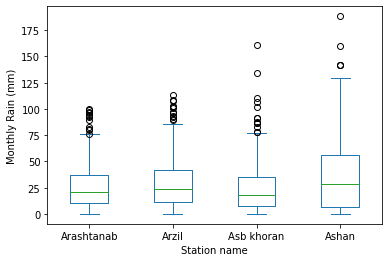

<Figure size 720x360 with 0 Axes>

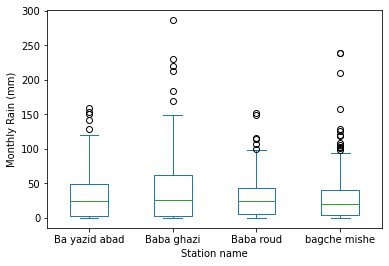

<Figure size 720x360 with 0 Axes>

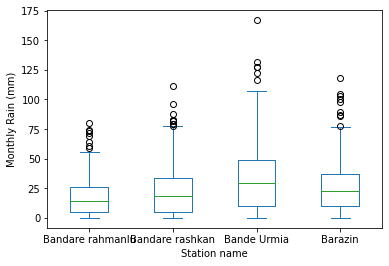

<Figure size 720x360 with 0 Axes>

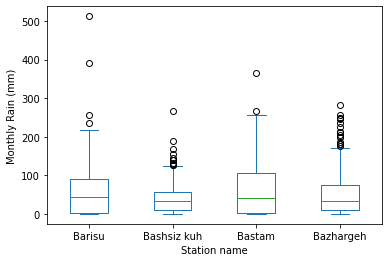

<Figure size 720x360 with 0 Axes>

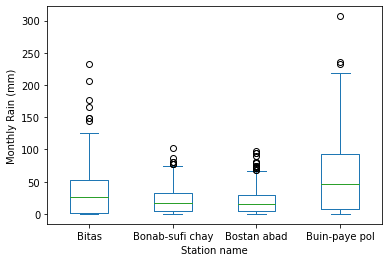

<Figure size 720x360 with 0 Axes>

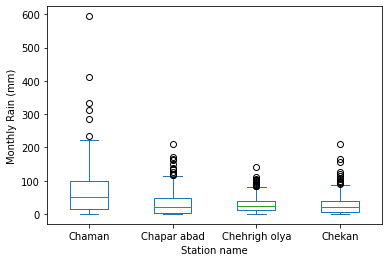

<Figure size 720x360 with 0 Axes>

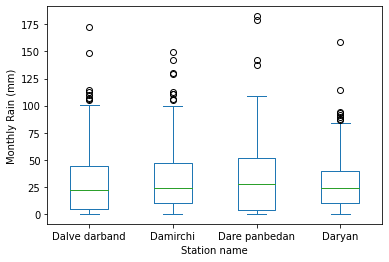

<Figure size 720x360 with 0 Axes>

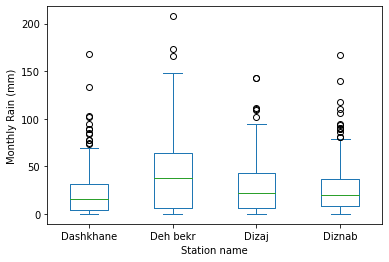

<Figure size 720x360 with 0 Axes>

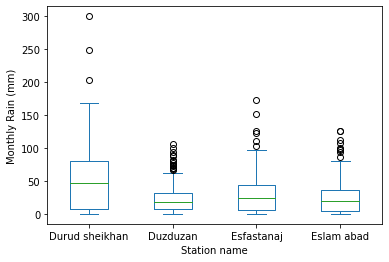

<Figure size 720x360 with 0 Axes>

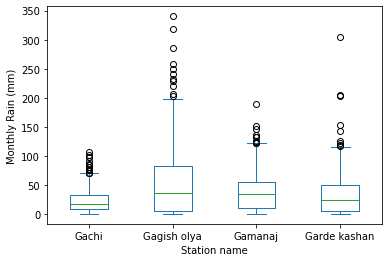

<Figure size 720x360 with 0 Axes>

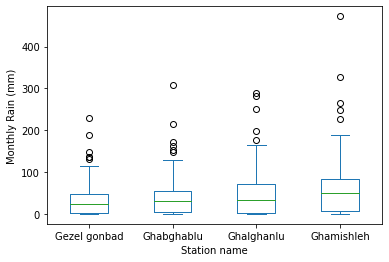

<Figure size 720x360 with 0 Axes>

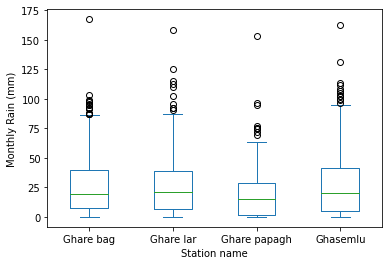

<Figure size 720x360 with 0 Axes>

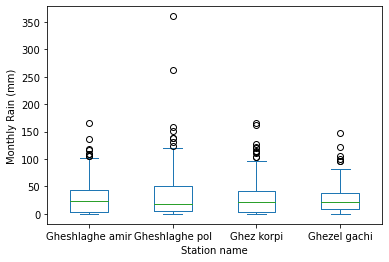

<Figure size 720x360 with 0 Axes>

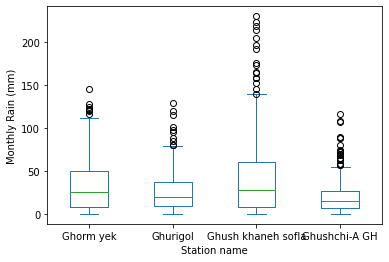

<Figure size 720x360 with 0 Axes>

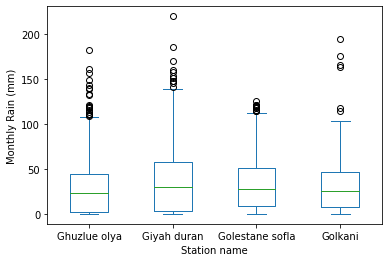

<Figure size 720x360 with 0 Axes>

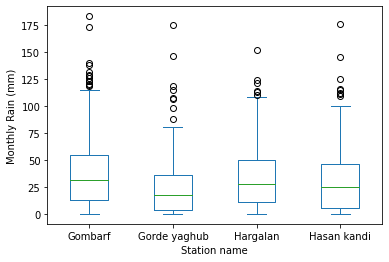

<Figure size 720x360 with 0 Axes>

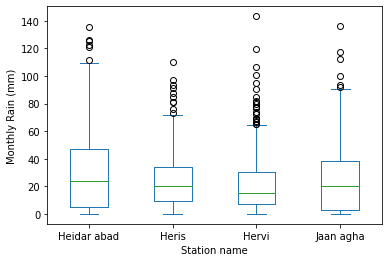

<Figure size 720x360 with 0 Axes>

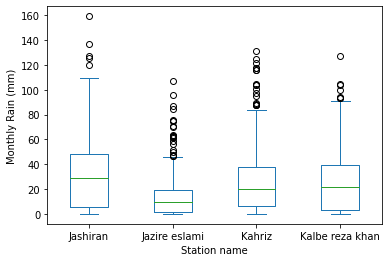

<Figure size 720x360 with 0 Axes>

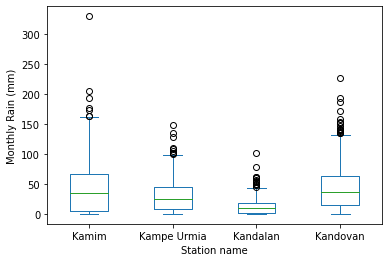

<Figure size 720x360 with 0 Axes>

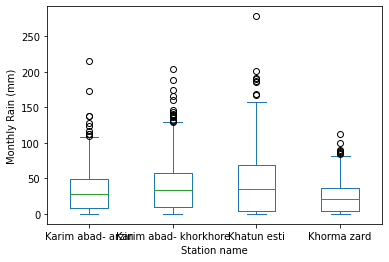

<Figure size 720x360 with 0 Axes>

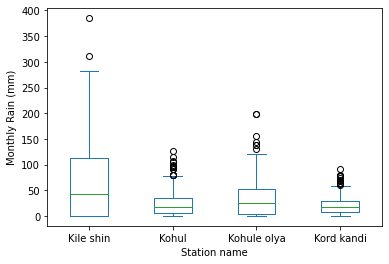

<Figure size 720x360 with 0 Axes>

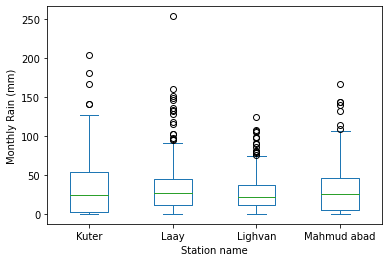

<Figure size 720x360 with 0 Axes>

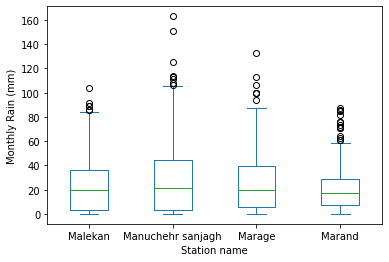

<Figure size 720x360 with 0 Axes>

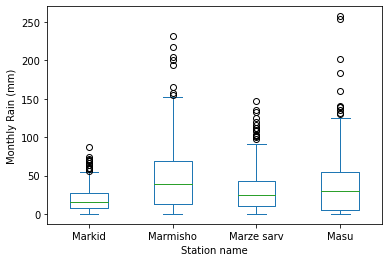

<Figure size 720x360 with 0 Axes>

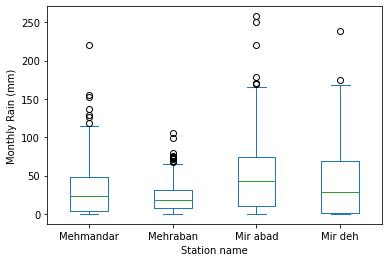

<Figure size 720x360 with 0 Axes>

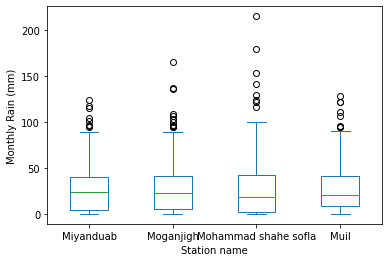

<Figure size 720x360 with 0 Axes>

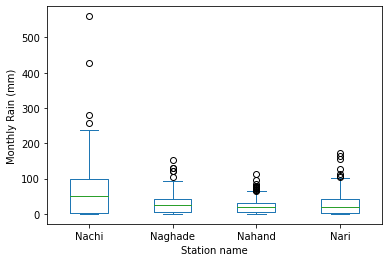

<Figure size 720x360 with 0 Axes>

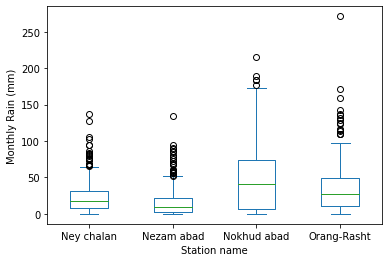

<Figure size 720x360 with 0 Axes>

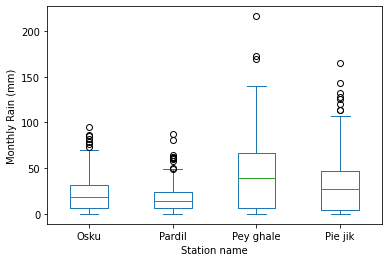

<Figure size 720x360 with 0 Axes>

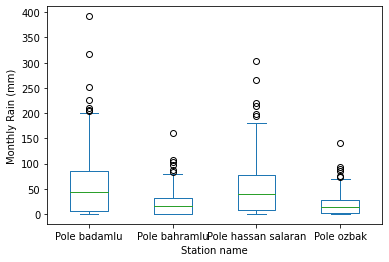

<Figure size 720x360 with 0 Axes>

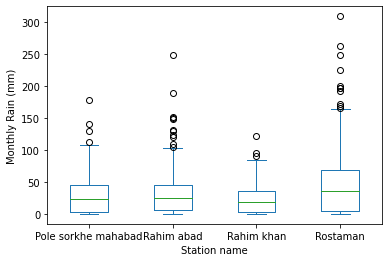

<Figure size 720x360 with 0 Axes>

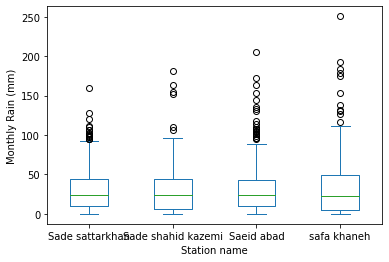

<Figure size 720x360 with 0 Axes>

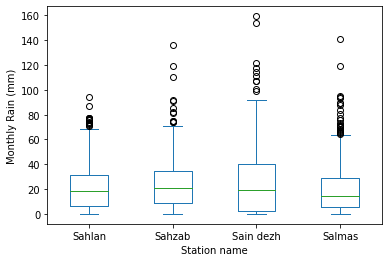

<Figure size 720x360 with 0 Axes>

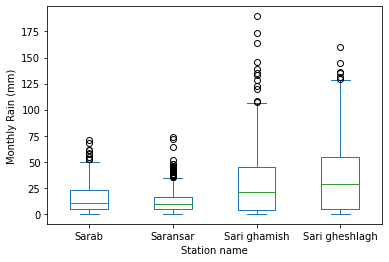

<Figure size 720x360 with 0 Axes>

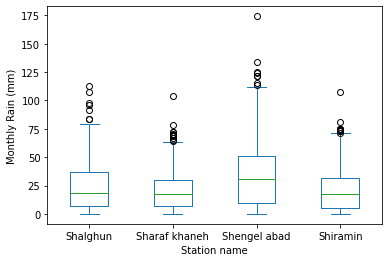

<Figure size 720x360 with 0 Axes>

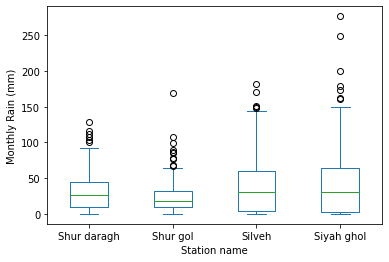

<Figure size 720x360 with 0 Axes>

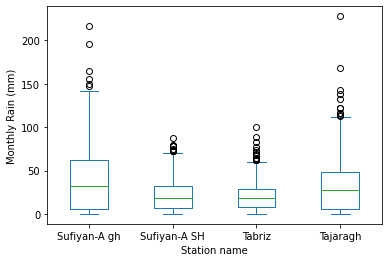

<Figure size 720x360 with 0 Axes>

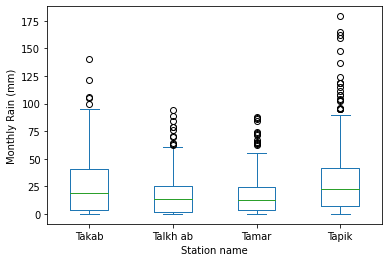

<Figure size 720x360 with 0 Axes>

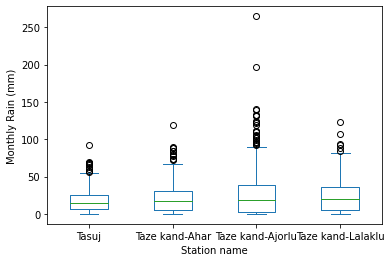

<Figure size 720x360 with 0 Axes>

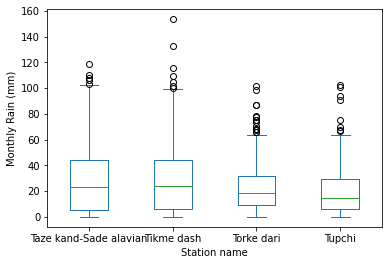

<Figure size 720x360 with 0 Axes>

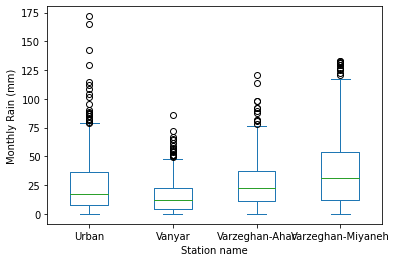

<Figure size 720x360 with 0 Axes>

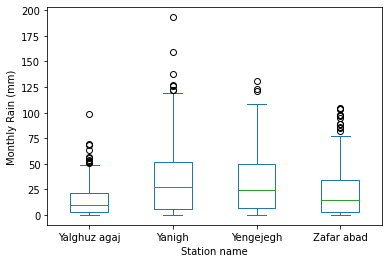

<Figure size 720x360 with 0 Axes>

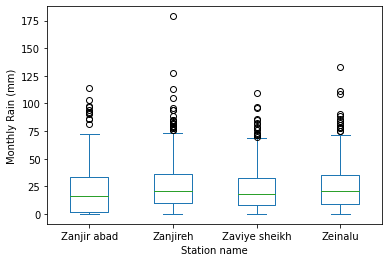

<Figure size 720x360 with 0 Axes>

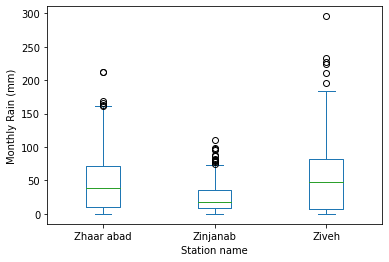

In [53]:
for i in range(1,229,5):
    plt.figure(figsize=(10,5))
    Rain[Rain.columns[i:i+4]].plot(kind='box')
    plt.ylabel('Monthly Rain (mm)')
    plt.xlabel('Station name')
#     plt.savefig('Stations _'+str(i)+'_to_'+ str(i+4)+ '.png')
    

In [54]:
comulative_rain=pd.DataFrame(Rain.sum(axis=0))

In [55]:
# comulative_rain

In [56]:
comulative_rain.drop('Month', inplace=True)

In [57]:
comulative_rain.rename(columns={0 : 'total_rain'}, inplace=True)

In [58]:
comulative_rain_percent=100*comulative_rain/comulative_rain.sum()

In [59]:
comulative_rain.describe()

,total_rain
count,228.000000
unique,228.000000
top,9841.356544
freq,1.000000


### This project is under development  ... 